Henry coefficient N2 (all in mol/kg/Pa):
Nott: 0.000011
Mg: 0.000003
UTSA 20: 0.000004
UTSA 80 : 0.000003
ZIF8 : not adsorbed so none

Henry coefficient CO2 (mol/kg/Pa):
Nott: 0.000185
Mg: 0.000087
UTSA 20: 0.000041
UTSA 80 : 0.000017
ZIF8 : 0.000009

| MOF   | N₂ Henry Coefficient [mol/kg/Pa] | CO₂ Henry Coefficient [mol/kg/Pa] |
|------------|:--------------------------------:|:----------------------------------:|
| Nott       |      1.1 × 10⁻⁵                  |        1.85 × 10⁻⁴                 |
| Mg         |      3.0 × 10⁻⁶                  |        8.7 × 10⁻⁵                  |
| UTSA 20    |      4.0 × 10⁻⁶                  |        4.1 × 10⁻⁵                  |
| UTSA 80    |      3.0 × 10⁻⁶                  |        1.7 × 10⁻⁵                  |
| ZIF8       |      not adsorbed                |        9.0 × 10⁻⁶                  |

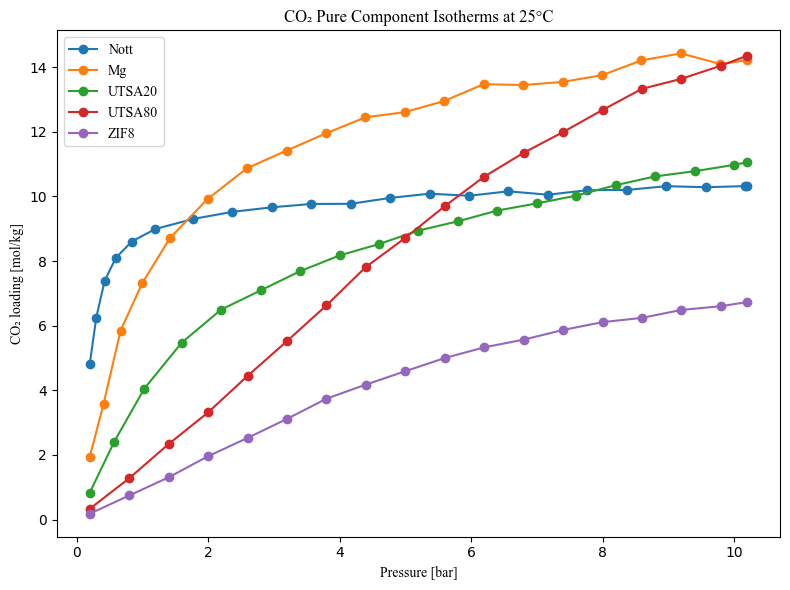

File N2_ZIF8.csv not found, skipping.


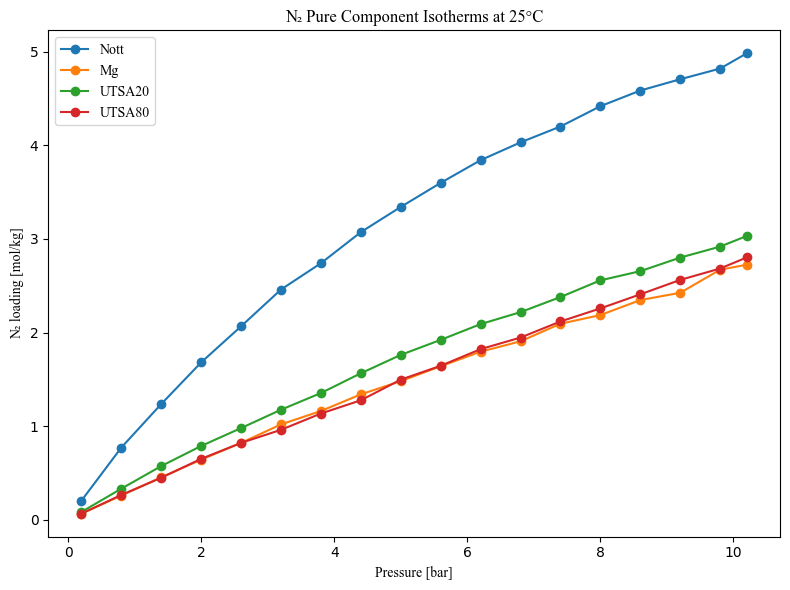

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# List of MOF names and corresponding file patterns
mofs = ["Nott", "Mg", "UTSA20", "UTSA80", "ZIF8"]

# Plot CO2 isotherms
plt.figure(figsize=(8,6))
for mof in mofs:
    try:
        df = pd.read_csv(f"CO2_{mof}.csv")
        plt.plot(df["Pressure [bar]"], df["CO2 loading [mol/kg]"], marker='o', label=mof)
    except FileNotFoundError:
        print(f"File CO2_{mof}.csv not found, skipping.")
plt.xlabel("Pressure [bar]", fontname='Times New Roman')
plt.ylabel("CO₂ loading [mol/kg]", fontname='Times New Roman')
plt.title("CO₂ Pure Component Isotherms at 25°C", fontname='Times New Roman')
plt.legend(prop={'family': 'Times New Roman'})
plt.tight_layout()
plt.show()

# Plot N2 isotherms
plt.figure(figsize=(8,6))
for mof in mofs:
    try:
        df = pd.read_csv(f"N2_{mof}.csv")
        plt.plot(df["Pressure [bar]"], df["N2 loading [mol/kg]"], marker='o', label=mof)
    except FileNotFoundError:
        print(f"File N2_{mof}.csv not found, skipping.")
plt.xlabel("Pressure [bar]", fontname='Times New Roman')
plt.ylabel("N₂ loading [mol/kg]", fontname='Times New Roman')
plt.title("N₂ Pure Component Isotherms at 25°C", fontname='Times New Roman')
plt.legend(prop={'family': 'Times New Roman'})
plt.tight_layout()
plt.show()

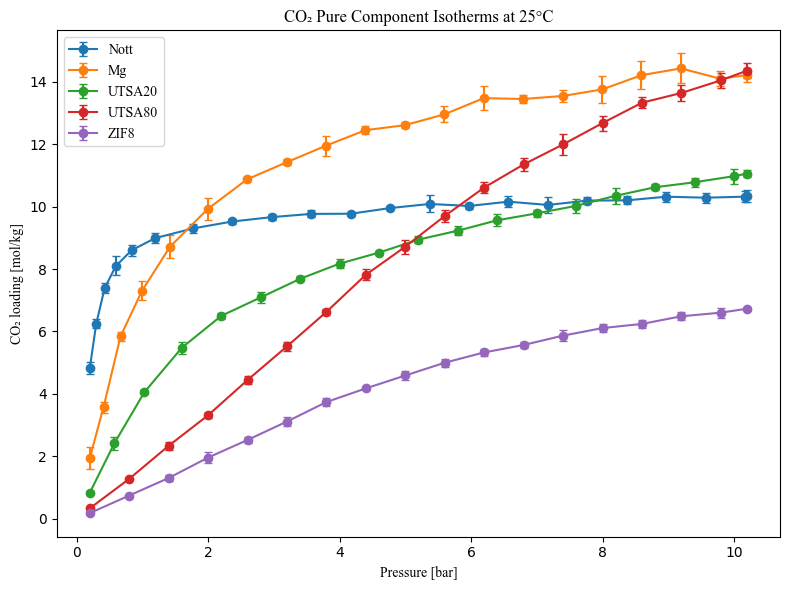

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# List of MOF names and corresponding file patterns
mofs = ["Nott", "Mg", "UTSA20", "UTSA80", "ZIF8"]

# Error bars for CO2 isotherms (must match the order of data points in each CSV)
co2_errors = {
    "Nott": [0.19314905296066, 0.14646486586789, 0.15893671799375, 0.30549044280161, 0.17806096854852, 0.15965116067975, 0.13634635058907, 0.079332809077675, 0.10213455800291, 0.11349375615428, 0.066596385479999, 0.064679815551539, 0.27292548513008, 0.10528296624337, 0.18557308634182, 0.26589810972209, 0.11622956317632, 0.126206899208, 0.16420696904908, 0.16457347146472, 0.17532745744001, 0.18597905380786],
    "Mg": [0.36183619787794, 0.1789087759628, 0.15310916193277, 0.29684198684089, 0.36593789400428, 0.34226512976414, 0.087257772826135, 0.09675616940329, 0.31527419485672, 0.12920707591146, 0.10567391697719, 0.2585235564038, 0.37538173304637, 0.12301253913275, 0.20610028126564, 0.41929048483523, 0.4418572902006, 0.48156109997832, 0.24419029745816, 0.23912030372833],
    "UTSA20": [0.04641153913335, 0.19812661066223, 0.068696777693199, 0.200099917751, 0.10109957307382, 0.17686194986526, 0.079923242250032, 0.13840188635068, 0.066224968782809, 0.11009180784533, 0.14877840158981, 0.18890198259254, 0.10822477232925, 0.22187103118499, 0.25882701418777, 0.093566901465975, 0.13674330854623, 0.24303028048665, 0.12255861791404],
    "UTSA80": [0.035791041233954, 0.03894574541493, 0.12499475766969, 0.07574801992393, 0.12774594248803, 0.15486665667204, 0.086438448174125, 0.17746357700156, 0.22546486624039, 0.1914786807143, 0.189580774986, 0.20650280249137, 0.34421145931738, 0.23971633616457, 0.17617049581954, 0.25678376424611, 0.23739040325629, 0.23752828081049],
    "ZIF8": [0.01854367393418, 0.05539508245937, 0.11051695286532, 0.18014980561887, 0.10090799074467, 0.15621364602798, 0.11561350423217, 0.048480110960202, 0.13468874676974, 0.12956345316073, 0.10809195825386, 0.087418869503192, 0.17614642444753, 0.14038842970952, 0.13688189337479, 0.12900918817026, 0.15827767499052, 0.033745856731706]
}

plt.figure(figsize=(8,6))
for mof in mofs:
    try:
        df = pd.read_csv(f"CO2_{mof}.csv")
        errors = co2_errors.get(mof, None)
        # Truncate or pad errors to match data length if needed
        if errors is not None:
            errors = errors[:len(df)]
        plt.errorbar(df["Pressure [bar]"], df["CO2 loading [mol/kg]"], 
                     yerr=errors, marker='o', label=mof, capsize=3)
    except FileNotFoundError:
        print(f"File CO2_{mof}.csv not found, skipping.")
plt.xlabel("Pressure [bar]", fontname='Times New Roman')
plt.ylabel("CO₂ loading [mol/kg]", fontname='Times New Roman')
plt.title("CO₂ Pure Component Isotherms at 25°C", fontname='Times New Roman')
plt.legend(prop={'family': 'Times New Roman'})
plt.tight_layout()
plt.show()

File N2_ZIF8.csv not found, skipping.


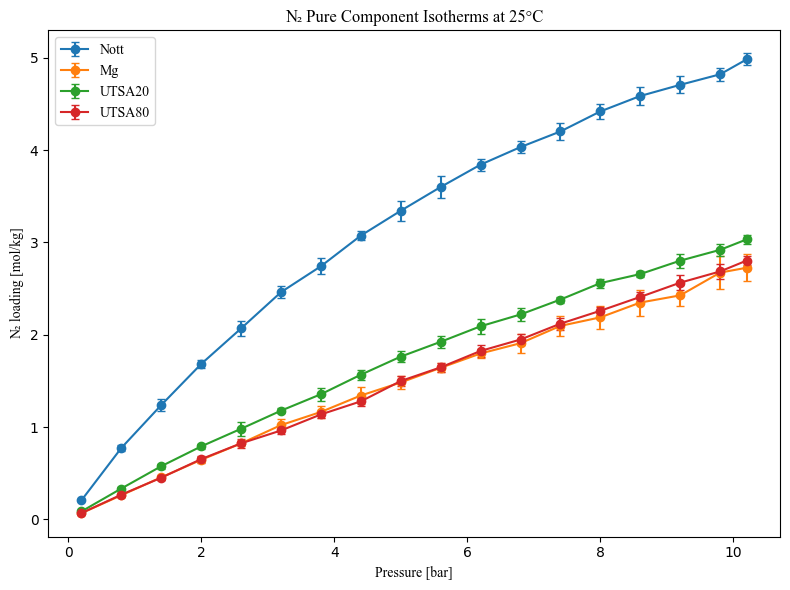

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# List of MOF names and corresponding file patterns
mofs = ["Nott", "Mg", "UTSA20", "UTSA80", "ZIF8"]

# Error bars for N2 isotherms (must match the order of data points in each CSV)
n2_errors = {
    "Nott": [0.0035623400602197, 0.033232046763587, 0.062522232585381, 0.038549897252703, 0.082878871498416, 0.062655133554651, 0.087298103372551, 0.047168069430986, 0.10592705901926, 0.1222191428713, 0.063930732625714, 0.066821170854989, 0.091213423027528, 0.080585770542662, 0.098282082990444, 0.091348013066792, 0.071995177514209, 0.064496936423192],
    "Mg": [0.0056218924460383, 0.018735146424688, 0.027303460407664, 0.028057955957337, 0.023149630368904, 0.062451196935033, 0.064723397336268, 0.09425600001076, 0.067267288210931, 0.046884450033499, 0.049462639281763, 0.1033941485063, 0.10726194849893, 0.12804467740696, 0.14137519259868, 0.11558102049211, 0.18215759932483, 0.14367877703836],
    "UTSA20": [0.0016102037165152, 0.01687302160537, 0.028790799114547, 0.029678594187721, 0.077956673537736, 0.028792702966149, 0.069383651923141, 0.056107410670732, 0.059443318820595, 0.062548030185063, 0.081472823126499, 0.06878508356197, 0.031913573991245, 0.047573853151686, 0.033258862286737, 0.077400007129258, 0.06612755833146, 0.046176199500647],
    "UTSA80": [0.00083704782946298, 0.023322858210438, 0.020418951770256, 0.036845334155126, 0.049704271248356, 0.033078902683937, 0.039152811734398, 0.053814017283756, 0.056840307435066, 0.052392937143559, 0.066992170176867, 0.059593855495074, 0.065389936663903, 0.046035978886199, 0.051725437737555, 0.078959857724545, 0.084673033948459, 0.052613809630932],
    # ZIF8 not provided, so will be skipped or plotted without error bars
}

plt.figure(figsize=(8,6))
for mof in mofs:
    try:
        df = pd.read_csv(f"N2_{mof}.csv")
        errors = n2_errors.get(mof, None)
        if errors is not None:
            errors = errors[:len(df)]
            plt.errorbar(df["Pressure [bar]"], df["N2 loading [mol/kg]"],
                         yerr=errors, marker='o', label=mof, capsize=3)
        else:
            plt.plot(df["Pressure [bar]"], df["N2 loading [mol/kg]"], marker='o', label=mof)
    except FileNotFoundError:
        print(f"File N2_{mof}.csv not found, skipping.")
plt.xlabel("Pressure [bar]", fontname='Times New Roman')
plt.ylabel("N₂ loading [mol/kg]", fontname='Times New Roman')
plt.title("N₂ Pure Component Isotherms at 25°C", fontname='Times New Roman')
plt.legend(prop={'family': 'Times New Roman'})
plt.tight_layout()
plt.show()

C:\Users\e-ale\AppData\Local\Temp\ipykernel_22200\1588696160.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(prop={'family': 'Times New Roman'})


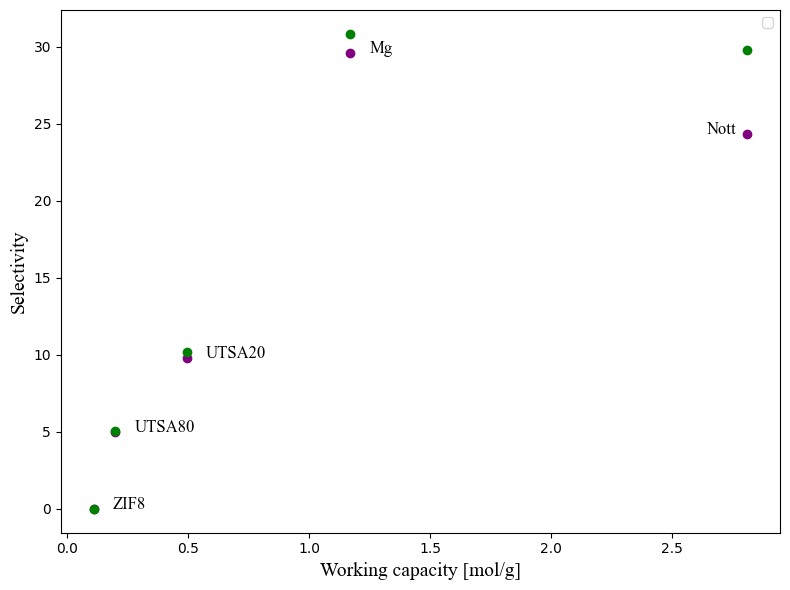

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


working_capacity = [1.1691, 0.4939, 0.1983, 0.1099, 2.8102]
selectivity_1 = [29.57, 9.81, 4.98, 0, 24.33]  # pression at 0.2 bar
selectivity_2 = [30.85, 10.18, 5.04, 0, 29.80] # pression at 1.01325 bar
mofs = ["Mg", "UTSA20", "UTSA80", "ZIF8", "Nott"]

plt.figure(figsize=(8,6))
plt.plot(working_capacity, selectivity_1, linestyle = ' ', marker = 'o', color = 'purple', linewidth = 1)
plt.plot(working_capacity, selectivity_2, linestyle = ' ', marker = 'o', color = 'green', linewidth = 1)

for i in range(len(working_capacity)-1):
    plt.text(working_capacity[i] + 0.08, selectivity_1[i], mofs[i], fontname= 'Times New Roman', fontsize = 12)

plt.text(working_capacity[4]-0.17, selectivity_1[4], mofs[4], fontname= 'Times New Roman', fontsize = 12)

plt.xlabel("Working capacity [mol/kg]", fontname = 'Times New Roman', fontsize = 14)
plt.ylabel("Selectivity", fontname = 'Times New Roman', fontsize = 14)
plt.legend(prop={'family': 'Times New Roman'})
plt.tight_layout()
plt.show()

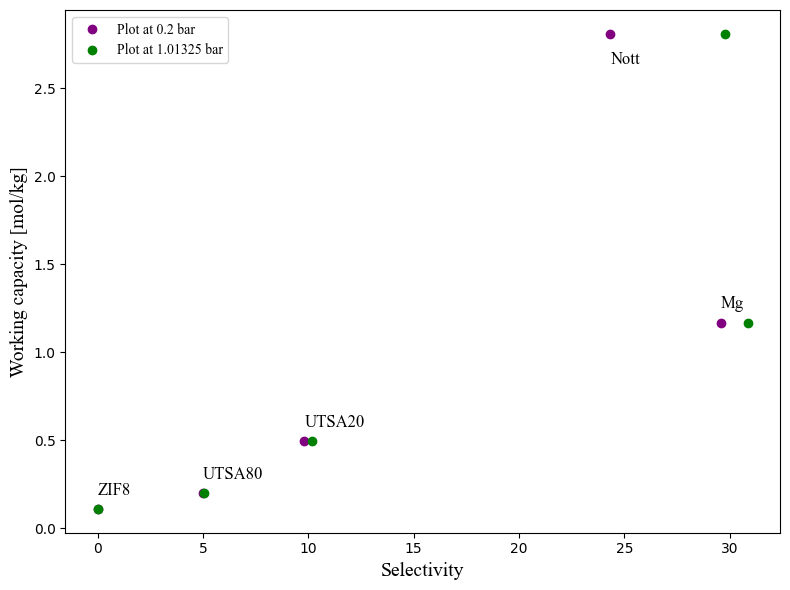

In [15]:
import matplotlib.pyplot as plt
import numpy as np


working_capacity = [1.1691, 0.4939, 0.1983, 0.1099, 2.8102]
selectivity_1 = [29.57, 9.81, 4.98, 0, 24.33]  # pression at 0.2 bar
selectivity_2 = [30.85, 10.18, 5.04, 0, 29.80] # pression at 1.01325 bar
mofs = ["Mg", "UTSA20", "UTSA80", "ZIF8", "Nott"]

plt.figure(figsize=(8,6))
plt.plot(selectivity_1, working_capacity, linestyle = ' ', marker = 'o', color = 'purple', linewidth = 1, label = "Plot at 0.2 bar")
plt.plot(selectivity_2, working_capacity, linestyle = ' ', marker = 'o', color = 'green', linewidth = 1, label = "Plot at 1.01325 bar")

for i in range(len(working_capacity)-1):
    plt.text(selectivity_1[i], working_capacity[i] + 0.08, mofs[i], fontname= 'Times New Roman', fontsize = 12)

plt.text(selectivity_1[4], working_capacity[4]-0.17, mofs[4], fontname= 'Times New Roman', fontsize = 12)

plt.ylabel("Working capacity [mol/kg]", fontname = 'Times New Roman', fontsize = 14)
plt.xlabel("Selectivity", fontname = 'Times New Roman', fontsize = 14)
plt.legend(prop={'family': 'Times New Roman'})
plt.tight_layout()
plt.show()